# Analysis of simulation results

First load the data from files into code. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm 

iterations = 5000
n_runs = 10
L = 50

# densities simulated 
rho_values = [0.04, 0.07, 0.08, 0.1, 0.11, 0.12, 0.14, 0.15, 0.16, 0.18, 0.19, 0.2, 0.22, 0.23, 0.26, 0.27]

# simulated soberness values
p_values = [round(i, 2) for i in np.arange(0.05, 1.05, 0.05)] 

# list of (rho, p, phi) tuples for 3D plot
data_points = [] 

# key=rho, value=2D list of phi values, one for every p value
all_data = {rho : [] for rho in rho_values}

# load data from files
for rho_index, rho in enumerate(rho_values):
    for p in p_values:
        my_data = np.genfromtxt(f'./results/data/runs_{n_runs}_p_{p}_rho_{rho}_L_{L}_iters_{iterations}.csv', delimiter = ',', skip_header=1)
        my_data = my_data.T
        phi_means = my_data[1]
        phi_stds = my_data[2]
        
        data_points.append((rho, p, np.mean(phi_means[:-100])))

        all_data[rho].append([phi_means, phi_stds])

# Average order progression for different crowd densities
Below is the progression of the order parameter during a run for different crowd densities $\rho$ and constant soberness (likeliness to move straight) of 0.8. The progression is averaged over 10 runs with the same initial state.

Note how for higher densities, $\tilde{\phi}$ converges to a lower value, due to part of the runs resulting in a jam which have $\tilde{\phi} = 0$, lowering the average converged $\phi$. For these parameters, the optimal density for lane formation lies between 0.1 and 0.22.

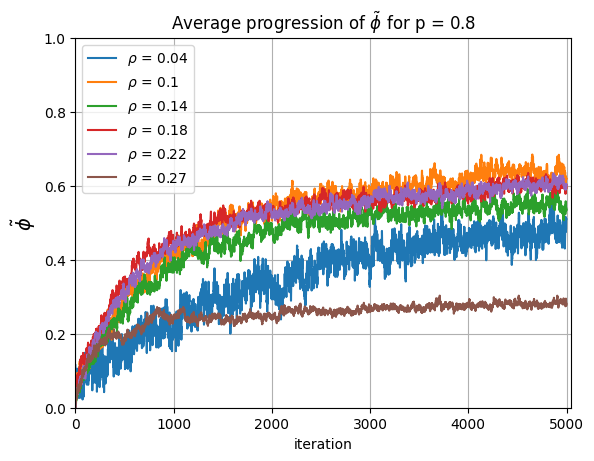

In [2]:
# plot average progression for different densities and p = 0.8
plt.figure()

for i, rho in enumerate(rho_values):
    plt.plot(range(iterations), all_data[rho][-5][0], label=f'$\\rho$ = {rho}') if i%3 == 0 else None
plt.ylabel('$\\tilde{\phi}$', fontsize=14)
plt.xlabel('iteration')
plt.title(f'Average progression of $\\tilde{{\phi}}$ for p = {p_values[-5]}')
plt.legend()
plt.xlim(0, 5050)
plt.ylim(0, 1)
plt.grid()
plt.show()


Below is an example of the final snapshot of a run that resulted in a complete jam, leading to an order parameter of $\phi = 0$. Just because this run resulted in a jam does not guarantee that it will happen for all runs with this parameter settings, some jams will resolve themselves on their own before the simulation finishes.

<img src="results/final_snapshots/L_50_rho_0.27_p_1.0.png" alt="title" >


# Average order progression for different levels of drunkness
Below is the progression of the order parameter during a run for different levels of drunkness $p_{drunk}$ and constant crowd density of 0.18 (low density chosen to exclude jamming). The progression is averaged over 10 runs with the same initial state.

For $p_{drunk}$ = 1.0 and $\rho = 0.18$, $\tilde{\phi}$ always converges to 1, meaning perfect lanes are lways formed for that parameter combination. Lower level of drunkness will always results in lanes that are more ordered, and even a substantial level of drunkness drunkness does not completely prevent the emergence of lanes. See the final snapshot below the plot with $p_{drunk}=0.35$ and $\rho$. 

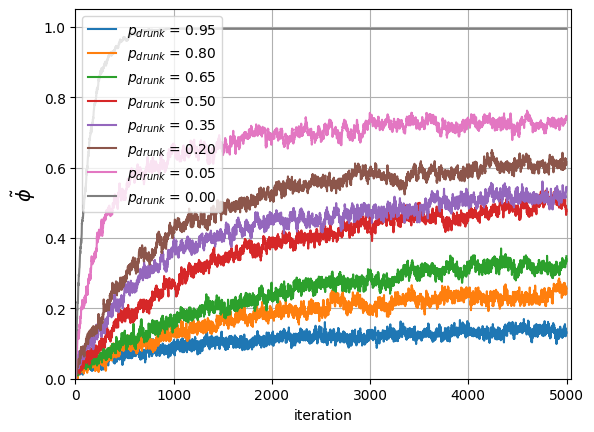

In [3]:
# plotting order progression for constant rho
plt.figure()
rho = 0.18
for i, p in enumerate(p_values):
    plt.plot(range(iterations), all_data[0.16][i][0], label=f'$p_{{drunk}}$ = {1-p:.2f}') if i % 3 == 0 or p==1 else None
plt.ylabel('$\\tilde{\phi}$', fontsize=14)
plt.xlabel('iteration')
plt.legend()
plt.xlim(0, 5050)
plt.ylim(0, 1.05)
plt.grid()
plt.show()

### Final snapshot of run with drunkness 0.35 and density 0.18
<img src="results/final_snapshots/L_50_rho_0.18_p_0.65.png" alt="title" >

# Converged order parameter as a function of the density
This is for constant soberness value of 0.8 (so drunkness 0.2), the converged $\tilde{\phi}$, measured over 10 runs with 5000 iterations each, as a function of the crowd density. Densities above 0.27 are left out, as these will nearly always result in a complete jam for this soberness value, and we had limited time to run all the parameter combinations. 

We observe the amount of lane formation sort of plateaus between $\rho=0.06$ and $\rho=0.23$, there does not appear to be an 'optimal' density for lane formation for $p_{drunk} = 0.2$. For $\rho < 0.05$ and $\rho > 0.25$, lane formation decays due to jamming or too little agents in the system to form lanes (lanes are only counted when at least two agents are following each other).

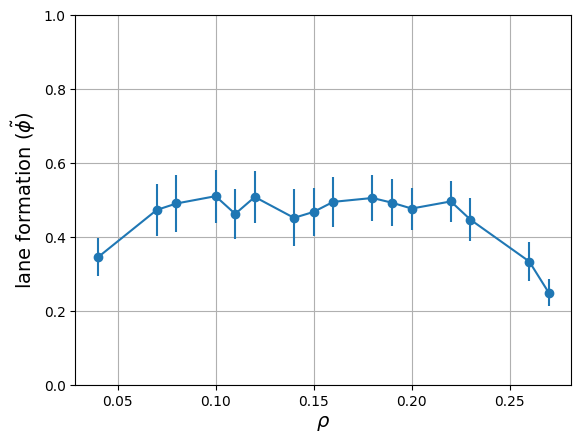

In [4]:
plt.figure()
plt.errorbar(x=rho_values, y=[np.mean(all_data[rho][-5][0][:-100]) for rho in rho_values], yerr=np.array([np.std(all_data[rho][7][0][:-100]) for rho in rho_values])/1.5, fmt='o-')
plt.xlabel('$\\rho$', fontsize=14)
plt.ylabel('lane formation ($\\tilde{\phi}$)', fontsize=14)
plt.grid()
plt.ylim(0, 1)
plt.show()

# Converged order parameter as a function of the drunkness
This is for constant density of 0.16, the final value of $\tilde{\phi}$ measured over 10 runs with 5000 iterations each. The relation resembles an exponential one, where the 'perfectness' of the lanes decays rapidly when drunknes increases slightly. 

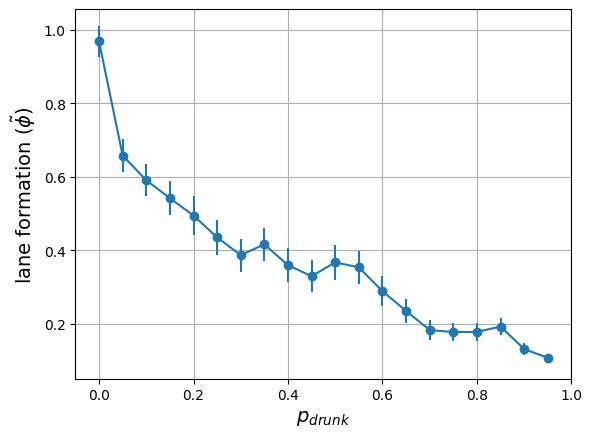

In [5]:
rho = 0.16
plt.figure()
plt.errorbar(1-np.array(p_values), [np.mean(all_data[rho][i][0][:-100]) for i in range(len(p_values))], yerr=1.96*np.array([np.std(all_data[rho][i][0][:-100]) for i in range(len(p_values))])/5, fmt='o-')
plt.xlabel('$p_{drunk}$', fontsize=14)
plt.ylabel('lane formation ($\\tilde{\phi}$)', fontsize=14)
plt.grid()
plt.xlim(-0.05, 1)
plt.show()

# confidence interval for one density, one drunkness value progression of line plot

Same plot as the one at the stat of the notebook, but with less densities and a confidence interval added.

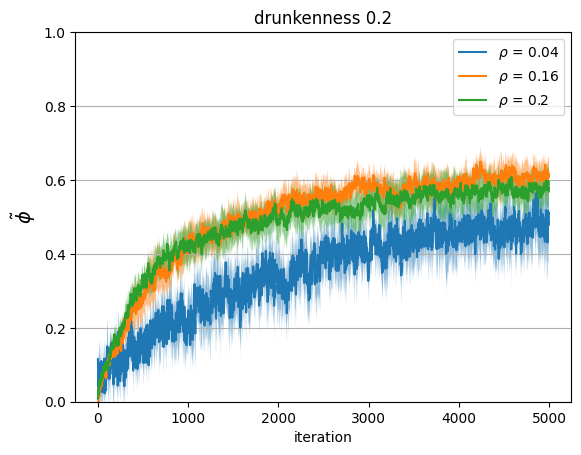

In [6]:
# plotting order progression for constant rho
plt.figure()
rhos = [0.04, 0.16, 0.2]
p = 0.8 

for rho in rhos:
    plt.plot(range(iterations), all_data[rho][-5][0], label=f'$\\rho$ = {rho}')
    plt.fill_between(x=range(iterations), y1=all_data[rho][-5][0]-1.96*all_data[rho][-5][1]/np.sqrt(10), y2=all_data[rho][-5][0]+1.96*all_data[rho][-5][1]/np.sqrt(10), alpha=0.5)
plt.ylabel('$\\tilde{\phi}$', fontsize=14)
plt.xlabel('iteration')
plt.title(f'drunkenness {round(1-p, 2)}')
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 1)
plt.show()

# 3D plot of $\rho$ vs $p$ cs $\phi$ (crowd density, vs drunkness vs amount of lane formation)
The 3D plot shows the amount of lane formation for all combinations of density and drunkness. The shape of the relations remains the same as the slices that were discussed before, there are no visible local optima for a specific combination of $\rho$ and $p_{drunk}$. 

<IPython.core.display.Javascript object>


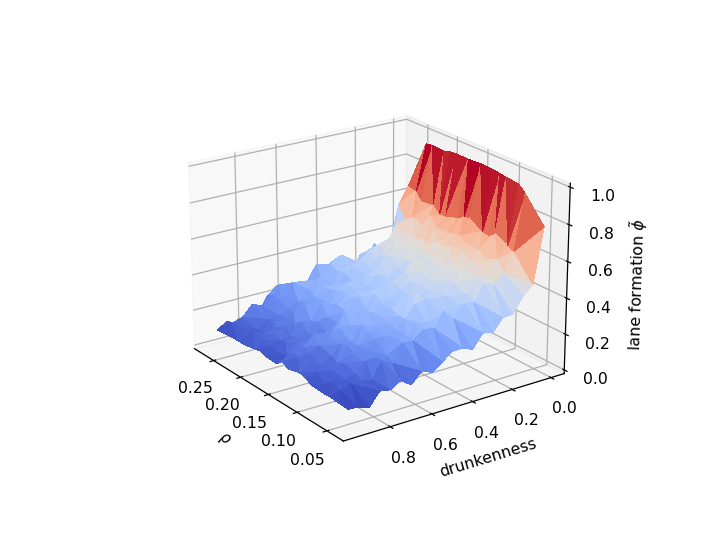

In [7]:
# surface plot, x = rho, y=p, z=phi

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plot the surface
ax.plot_trisurf(
    [rho for rho,_,_ in data_points], 
    [1-p for _,p,_ in data_points], 
    [phi for _,_,phi in data_points], 
    linewidth=0, antialiased=False, cmap=cm.coolwarm)

ax.set_xlabel('$\\rho$')
ax.set_ylabel('drunkenness')
ax.set_zlabel('lane formation $\\tilde{\phi}$')
ax.set_zlim(0, 1)
plt.show()